In [ ]:
import pandas as pd
import numpy as np
from math import * 
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
import pickle

%matplotlib inline
plt.figure(figsize=(16,16))
plt.rcParams.update({'figure.figsize': (16, 8)})


<Figure size 1152x1152 with 0 Axes>

# read the data

In [ ]:
G = nx.read_edgelist("facebook_combined.txt", nodetype = int)

# graph layout
with open('networkShape.pkl', 'rb') as f:
    sp = pickle.load(f)

# read data
data = pd.read_csv("TOPSIS_result.csv", header = 0)
data.drop(columns=['TOPSIS'], inplace=True)
data = data.set_index('node')

# adjacency matrix of G - with to order of data
mat = nx.to_numpy_array(G, nodelist = data.index.tolist() )

# K-means with centrality measures

In [ ]:
# kmeans
def kmeans(X, n_cluster):
  
    init = X[0:n_cluster]    
    # kmeans application
    km = KMeans(n_clusters = n_cluster, n_init=1, init = init, max_iter = 1000)
    cluster = km.fit_predict(X)
    res = data.copy()
    res['cluster'] = cluster
    res.drop(columns=['DC','BC','CC', 'EC'], inplace=True)
    res.reset_index(inplace=True)
    res.rename(columns={"index":'node'}, inplace=True)
    # distance from centroids
    centroids = km.cluster_centers_
    diff = (init - centroids) ** 2
    dist = []
    for i in range(diff.shape[0]):
        dist.append(sqrt(sum(diff[i])))
        
    comp = res.head(n_cluster).copy()
    comp = comp.assign(dist_from_centroid = dist)

    return (res , comp)
  

# scatter plot
def scatter(result):
    plt.figure(figsize=(8,5))
    plt.scatter(result['node'], result['cluster'])
    plt.xlabel("Node")
    plt.ylabel("Cluster")
    return

# distribution
def distribution(result):
    d = result.groupby('cluster').size().to_dict()
    d = pd.DataFrame({'cluster' : d.keys(), 'size' : d.values()})
    ax = d.plot.bar(x = "cluster", y = 'size', figsize=(8, 5)) 
    plt.title('node distribution')
    plt.xlabel('Cluster')
    plt.ylabel('nodes number')
    plt.grid(axis='y', alpha=0.75)
    # add the value of each bar 
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    return

# node group
def node_group(result):
    node_part = []
    for i in sorted(result.cluster.unique().tolist()):
      c = list(result[result.cluster == i].node)
      node_part.append(c)
  
    return node_part


In [ ]:
def plot_coms(coms):
    k = len(coms)

    node_size=[]
    for i in range(k):
        com_list=[]
        for j in coms[i]:
            list1 = data.head(k).index.tolist()
            if j in list1:
                com_list.append(1000)
            else:
                com_list.append(35)
        node_size.append(com_list)
        
    keyList = data.head(k).index.tolist()
    myDict = {key: key for key in keyList}
  
    colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange', 'aqua','olive','indigo', 'lawngreen', 'burlywood','slategray']
    for i in range(k):
        nx.draw_networkx(G, pos=sp, nodelist = coms[i], node_color= colors[i],node_size = node_size[i] ,with_labels=False , edgecolors='black')
  
    labels=nx.draw_networkx_labels(G,pos = sp, labels=myDict, font_color='w', font_weight='bold')
    return

# Get the K value from user 

In [ ]:
k = int(input("Enter the number of clusters : K = "))

Enter the number of clusters : K = 14


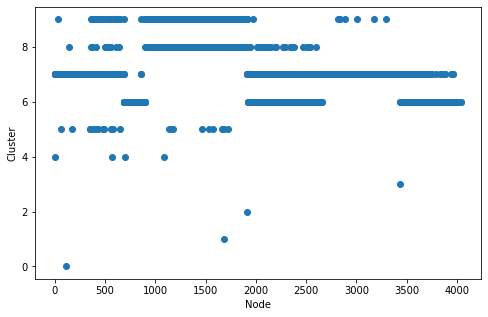

In [ ]:
result , centroids_comparison = kmeans(data.values, k)
scatter(result)

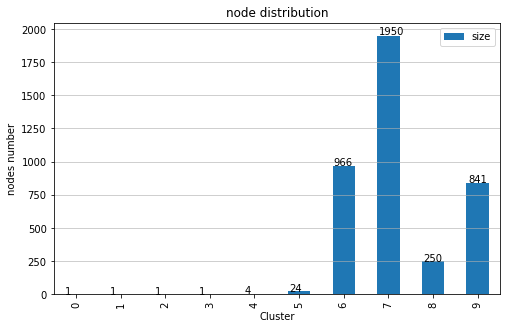

In [ ]:
distribution(result)

In [ ]:
centroids_comparison

,node,cluster,dist_from_centroid
0,107,0,0.000000e+00
1,1684,1,1.270549e-19
2,1912,2,0.000000e+00
3,3437,3,6.950964e-20
4,0,4,6.135841e-02
5,1085,4,1.300567e-01
6,698,4,1.231687e-01
7,567,4,1.109783e-01
8,58,5,1.203965e-01
9,428,5,1.019312e-01


# plot the graph clusters

In [ ]:
node_group = node_group(result)

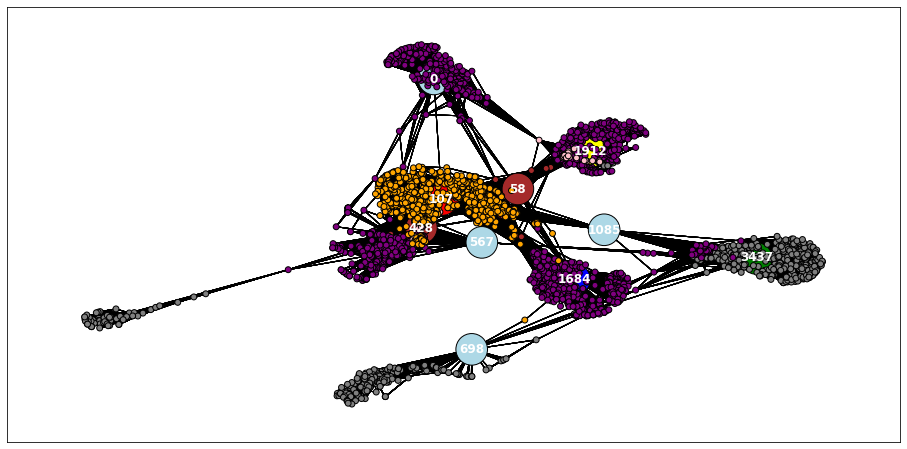

In [ ]:
plot_coms(node_group)

# New centroids position

In [ ]:
centroids_comparison

,node,cluster,dist_from_centroid
0,107,0,0.000000e+00
1,1684,1,1.270549e-19
2,1912,2,0.000000e+00
3,3437,3,6.950964e-20
4,0,4,6.135841e-02
5,1085,4,1.300567e-01
6,698,4,1.231687e-01
7,567,4,1.109783e-01
8,58,5,1.203965e-01
9,428,5,1.019312e-01


# K-means with edges

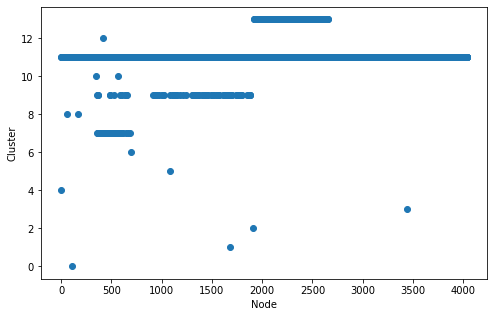

In [ ]:
result , centroids_comparison = kmeans(mat, k)
scatter(result)

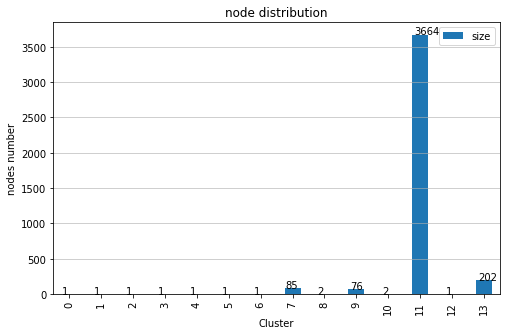

In [ ]:
distribution(result)

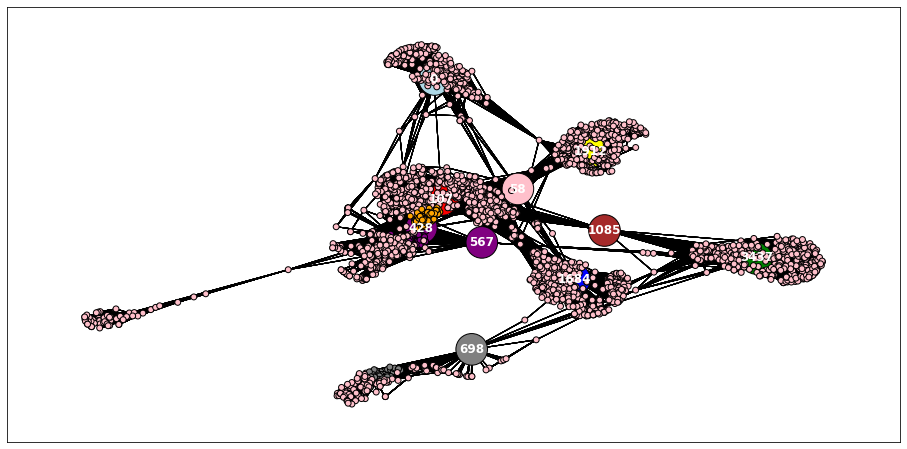

In [ ]:
node_partition = node_group(result)
plot_coms(node_partition)

# New centroids position

In [ ]:
result.head(k)

,node,cluster
0,107,0
1,1684,1
2,1912,2
3,3437,3
4,0,4
5,1085,5
6,698,6
7,567,7
8,58,8
9,428,7


In [ ]:
centroids_comparison

,node,cluster,dist_from_centroid
0,107,0,0.000000
1,1684,1,0.000000
2,1912,2,0.000000
3,3437,3,0.000000
4,0,4,0.000000
5,1085,5,0.000000
6,698,6,7.685501
7,567,7,5.722233
8,58,8,3.418773
9,428,7,9.790671
